<a href="https://colab.research.google.com/github/allenjose24/Breast-Cancer-Classification-Using-Decision-Tree-and-Random-Forest-A-Comparative-Study/blob/main/ML_Assignment_2_Solved_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Decision Tree and Random Forest

Consider The Wisconsin Breast Cancer Database.

This dataset consists of 10 continuous attributes and 1 target class attribute.

Class attribute shows the observation result, whether the patient is suffering from the benign tumor or malignant tumor.

Benign tumors do not spread to other parts while the malignant tumor is cancerous.

Take Target variable as diagnosis

### 1.2 Import the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

### 1.3 Load the dataset

In [ ]:
data = pd.read_csv('/content/wisc_bc_data.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.4 Check the data type for dataset?

In [ ]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### 1.5 Check the data.describe for dataset?

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 1.6 Check the data.groupby count for diagnosis?

In [ ]:
data.groupby('diagnosis').count()
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

### 1.7 drop the first column from the data frame. This is Id column which is not used in modeling?

In [ ]:
data = data.drop(data.columns[0], axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.8 Create a separate dataframe consisting only of the features i.e independent attributes

In [ ]:
features = data.drop('diagnosis', axis=1)
features.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.9 convert the features into z scores as we do not know what units / scales were used and store them in new dataframe

It is always adviced to scale numeric attributes in models that calculate distances.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features_df.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### 1.10 Capture the class values from the 'diagnosis' colum.

In [ ]:
class_values = data['diagnosis']
class_values.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

### 1.11 Extract the independent variable X and dependent variable Y?

In [ ]:
X = scaled_features_df
Y = class_values
X.head(), Y.head()


(   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 0     1.097064     -2.073335        1.269934   0.984375         1.568466   
 1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
 2     1.579888      0.456187        1.566503   1.558884         0.942210   
 3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
 4     1.750297     -1.151816        1.776573   1.826229         0.280372   
 
    compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
 0          3.283515        2.652874             2.532475       2.217515   
 1         -0.487072       -0.023846             0.548144       0.001392   
 2          1.052926        1.363478             2.037231       0.939685   
 3          3.402909        1.915897             1.451707       2.867383   
 4          0.539340        1.371011             1.428493      -0.009560   
 
    fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst 

### 1.12 Split the data into train and test set:(70/30)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")


X_train shape: (398, 30)
X_test shape: (171, 30)
Y_train shape: (398,)
Y_test shape: (171,)


## 1.13 Import all the algorithms we want to test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
print("Algorithms imported:")
print("DecisionTreeClassifier, RandomForestClassifier")


Algorithms imported:
DecisionTreeClassifier, RandomForestClassifier


#### 1.13a) Prepare an array with decision tree and random forest algorithms

In [ ]:
algorithms = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42))
]

for name, model in algorithms:
    print(f"{name} model ready.")


Decision Tree model ready.
Random Forest model ready.


####  1.13b) Prepare the configuration to run the (X,Y),seed=7

In [ ]:
seed_value = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed_value)
algorithms = [
    ("Decision Tree", DecisionTreeClassifier(random_state=seed_value)),
    ("Random Forest", RandomForestClassifier(random_state=seed_value))
]
print("Configuration is ready with seed =", seed_value)


Configuration is ready with seed = 7


#### 1.13 c) Every algorithm is tested and results are collected and printed?


In [ ]:
results = {}

for name, model in algorithms:
    # Fit the model on the training data
    model.fit(X_train, Y_train)

    # Predict on the test data
    Y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, Y_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)

    # Generate classification report
    report = classification_report(Y_test, Y_pred)

    # Store the results in the dictionary
    results[name] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': report
    }

    # Print the results for the current algorithm
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    print("------------------------------------")

print("\nSummary of Results:")
for name, result in results.items():
    print(f"{name}: Accuracy = {result['accuracy']:.4f}")


Results for Decision Tree:
Accuracy: 0.9240
Confusion Matrix:
[[113   3]
 [ 10  45]]
Classification Report:
              precision    recall  f1-score   support

           B       0.92      0.97      0.95       116
           M       0.94      0.82      0.87        55

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171

------------------------------------
Results for Random Forest:
Accuracy: 0.9708
Confusion Matrix:
[[115   1]
 [  4  51]]
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98       116
           M       0.98      0.93      0.95        55

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

------------------------------------

Summary of Results:
Decision Tree: Accuracy = 0.9240
Ra

#### 1.13 d) boxplot algorithm comparison

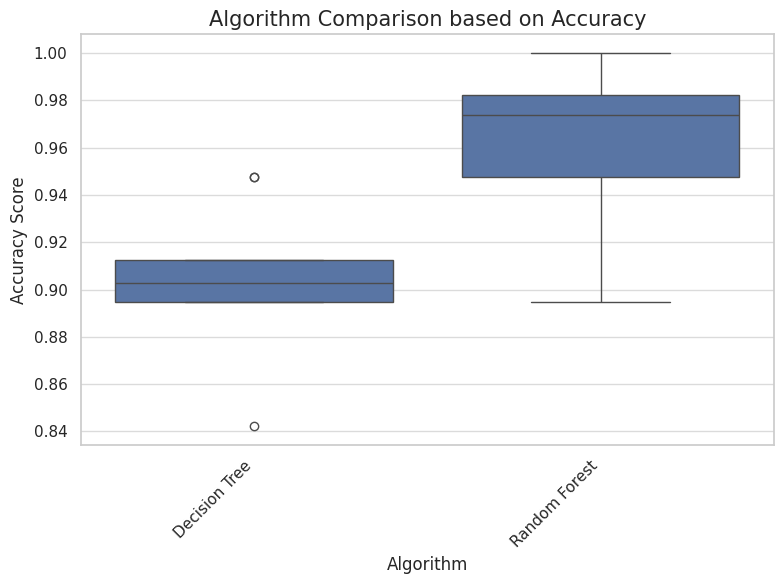

In [ ]:

# cross-validation and collect accuracy scores
for name, model in algorithms:
    # 10-fold cross-validation
    scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
    results[name] = scores

# Flattening the data for seaborn boxplot
flat_accuracy_scores = [score for name in results for score in results[name]]
flat_algorithms = [name for name in results for _ in results[name]]

# DataFrame for plotting
data_for_plot = pd.DataFrame({'Algorithm': flat_algorithms, 'Accuracy': flat_accuracy_scores})

# Plotting boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Algorithm', y='Accuracy', data=data_for_plot)
plt.title('Algorithm Comparison based on Accuracy', fontsize=15)
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()